In [1]:
import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

In [2]:
data=pd.read_excel(r"C:\Users\Lenovo\Documents\MSC Project\Data (1).xlsx")
data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,Job,450000,4,1,Friend,Built-up,Near TC College,1,722,Children Play ground,...,1,2023,3,1,2,No,Yes,One day later,By EMI,2000000
1,Treding,1000000,4,3,Friend,Super built-up,Near TC College,2,1800,"Garden, Children Play ground",...,2,2010,4,2,1,No,Yes,Everyday,By EMI,2500000
2,Job,200000,4,2,Dealer,Built-up,Near TC College,2,650,Children Play ground,...,1,2005,3,2,3,No,Yes,Everyday,By EMI,500000
3,Job,350000,4,1,Advertisement,Built-up,Near TC College,1,400,No,...,1,2021,3,3,1,No,Yes,Everyday,By EMI,2000000
4,Job,100000,5,1,Dealer,Built-up,Near TC College,3,1200,Garden,...,2,2023,4,3,1,No,Yes,Everyday,By EMI,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Job,1200000,4,2,Friend,Super built-up,Sahyog Society,2,900,"Auditoriam Garden, Children Play ground",...,2,2021,5,4,2,Yes,Yes,Everyday,By EMI,3500000
305,Teacher,1000000,5,1,Friend,Super built-up,Sahyog Society,2,1000,"Garden, Children Play ground",...,2,2018,4,2,2,No,Yes,Everyday,By EMI,3200000
306,Business,1400000,4,1,Dealers,Super built-up,Sahyog Society,3,1300,Auditoriam Children Play ground,...,3,2020,5,4,2,Yes,Yes,Everyday,By EMI,5000000
307,Business,1600000,6,2,Dealers,Super built-up,Sahyog Society,2,950,Auditoriam Children Play ground,...,2,2022,4,4,2,Yes,Yes,Everyday,By EMI,4000000


# Dtype Conversion

In [3]:
data.dtypes

Profession                   object
Annual_Income                 int64
Family_member                 int64
Family_earners                int64
source_of_flat               object
Area                         object
Location                     object
Type_of_flat                  int64
Area_in_sqft                  int64
Amenities                    object
Availability_of_resources    object
Bathrooms                     int64
Availability_of_flat          int64
No_floors_in_building         int64
Floor_no                      int64
Balcony                       int64
Lift                         object
Parking                      object
Water_supply                 object
Buying_of_Flat               object
Price                         int64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
data.Area=le.fit_transform(data.Area)
data.Area.value_counts()

2    215
1     49
3     39
5      4
0      1
4      1
Name: Area, dtype: int64

In [6]:
data.source_of_flat=le.fit_transform(data.source_of_flat)
data.source_of_flat.value_counts()

3    133
2     90
1     55
0     31
Name: source_of_flat, dtype: int64

In [7]:
data.Profession=le.fit_transform(data.Profession)
data.Profession.value_counts()

9     125
1      46
15     27
0      21
16     17
7      16
6      16
14     13
11      6
2       5
17      4
8       3
12      3
10      2
3       2
5       1
13      1
4       1
Name: Profession, dtype: int64

In [8]:
data.Water_supply=le.fit_transform(data.Water_supply)
data.Water_supply.value_counts()

0    257
1     25
2     24
3      3
Name: Water_supply, dtype: int64

In [9]:
data.Buying_of_Flat=le.fit_transform(data.Buying_of_Flat)
data.Buying_of_Flat.value_counts()

0    263
1     46
Name: Buying_of_Flat, dtype: int64

In [10]:
data.Parking=le.fit_transform(data.Parking)
data.Parking.value_counts()

1    308
0      1
Name: Parking, dtype: int64

In [11]:
data.Lift =le.fit_transform(data.Lift)
data.Lift.value_counts()

1    160
0    149
Name: Lift, dtype: int64

In [12]:
data.Location=le.fit_transform(data.Location)
data.Location.value_counts()

17    20
6     18
5     16
25    16
37    14
19    12
42    12
10    11
3     11
39    10
12    10
41    10
13    10
33    10
29     9
30     9
34     9
21     8
11     8
36     7
4      7
28     7
8      6
44     6
51     4
15     4
24     3
2      3
45     3
26     3
20     2
0      2
38     2
43     2
54     2
35     1
40     1
14     1
23     1
16     1
18     1
7      1
57     1
27     1
9      1
22     1
1      1
32     1
53     1
55     1
56     1
46     1
52     1
47     1
50     1
49     1
48     1
31     1
Name: Location, dtype: int64

In [13]:
data.Amenities=le.fit_transform(data.Amenities)
data.Amenities.value_counts()

12    126
4      78
7      33
10     30
14     12
17      5
0       5
2       4
1       3
9       2
18      2
5       2
16      1
3       1
13      1
6       1
15      1
11      1
8       1
Name: Amenities, dtype: int64

In [14]:
data.Availability_of_resources=le.fit_transform(data.Availability_of_resources)
data.Availability_of_resources.value_counts()

9     71
10    71
7     70
14    28
5     15
13    13
16    10
6      8
15     6
4      5
8      4
18     1
1      1
2      1
17     1
12     1
0      1
11     1
3      1
Name: Availability_of_resources, dtype: int64

In [15]:
data.dtypes

Profession                   int32
Annual_Income                int64
Family_member                int64
Family_earners               int64
source_of_flat               int32
Area                         int32
Location                     int32
Type_of_flat                 int64
Area_in_sqft                 int64
Amenities                    int32
Availability_of_resources    int32
Bathrooms                    int64
Availability_of_flat         int64
No_floors_in_building        int64
Floor_no                     int64
Balcony                      int64
Lift                         int32
Parking                      int32
Water_supply                 int32
Buying_of_Flat               int32
Price                        int64
dtype: object

In [16]:
######## PPS ###############

In [17]:
######## PPS MATRIX ###############

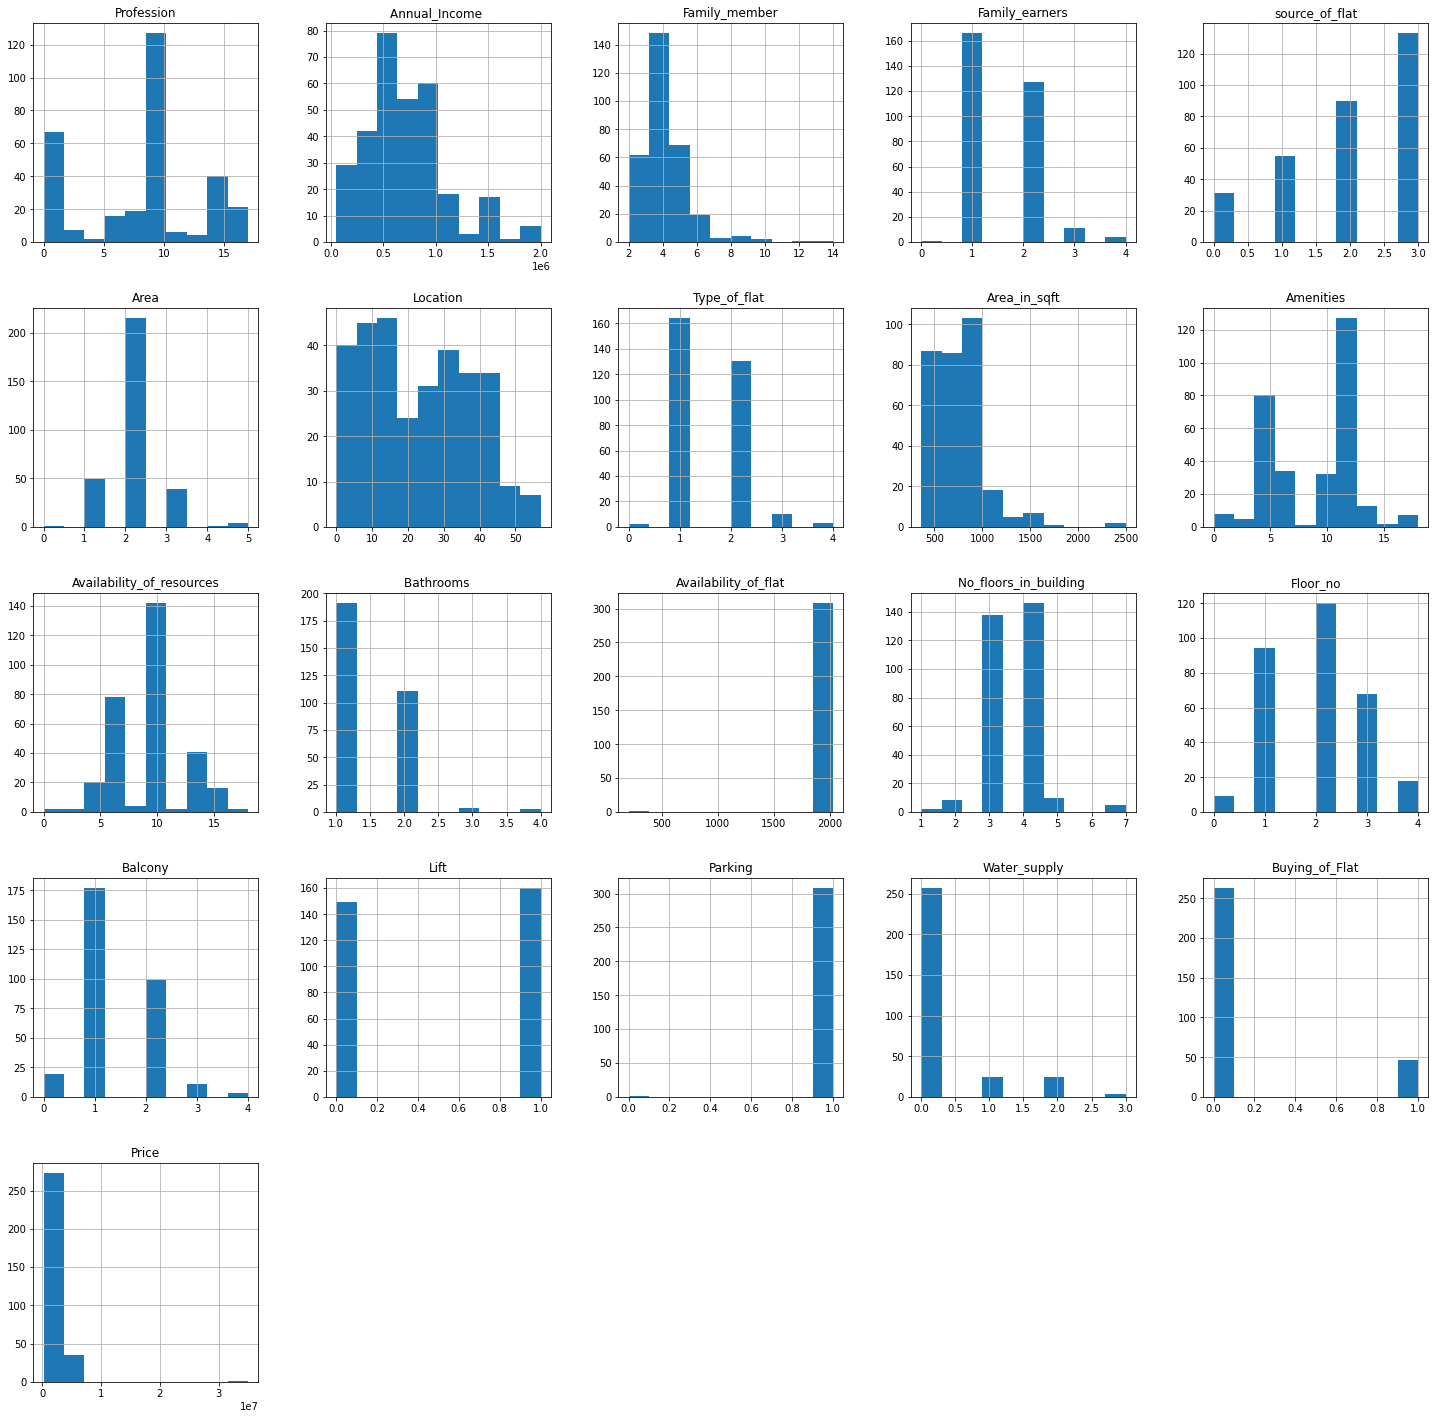

In [18]:
data.hist(figsize=(25,25))
plt.show()

# Skewness Treatment 

In [19]:
data.skew()

Profession                   -0.141065
Annual_Income                 0.820238
Family_member                 2.630147
Family_earners                1.068495
source_of_flat               -0.702763
Area                          1.111771
Location                      0.223953
Type_of_flat                  0.905410
Area_in_sqft                  1.684289
Amenities                    -0.304364
Availability_of_resources     0.407325
Bathrooms                     1.332607
Availability_of_flat        -17.511707
No_floors_in_building         1.103595
Floor_no                      0.266911
Balcony                       0.717473
Lift                         -0.071591
Parking                     -17.578396
Water_supply                  2.387697
Buying_of_Flat                1.982527
Price                        11.973157
dtype: float64

In [20]:
data.loc[data["Profession"]==0]

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
5,0,300000,4,2,3,2,19,2,750,7,...,2,2017,4,2,1,1,1,0,0,2500000
44,0,350000,9,1,3,2,36,1,600,12,...,1,2013,3,1,1,0,1,0,1,1700000
78,0,800000,4,1,1,2,1,0,400,12,...,1,2020,3,3,0,0,1,0,1,1500000
86,0,1900000,3,1,1,2,3,3,1600,12,...,2,2022,4,4,1,1,1,0,0,5500000
131,0,800000,4,1,1,2,13,1,400,12,...,1,2018,4,2,1,0,1,0,1,1750000
138,0,800000,4,1,2,2,41,1,400,12,...,1,2015,3,1,1,0,1,0,0,1700000
167,0,1500000,4,1,2,2,29,2,960,12,...,2,2018,4,1,1,1,1,0,0,4200000
181,0,800000,5,3,3,2,20,2,820,4,...,2,2020,4,3,1,1,1,1,1,2200000
220,0,1000000,4,2,2,5,14,3,2500,13,...,4,2023,4,3,4,0,1,0,1,1500000
225,0,500000,3,1,3,1,42,1,420,10,...,1,2018,4,2,1,0,1,0,0,2250000


In [21]:
#data.Profession.skew()

In [22]:
#v2=np.sqrt(data.Profession)

In [23]:
#v2.skew()

In [24]:
data.loc[data["Family_member"]==0]

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price


In [25]:
data.Family_member.skew()

2.630147423033079

In [26]:
v1=np.log(data.Family_member)

In [27]:
v1.skew()

0.290584978650301

In [28]:

data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,9,450000,4,1,3,2,19,1,722,4,...,1,2023,3,1,2,0,1,1,0,2000000
1,17,1000000,4,3,3,5,19,2,1800,9,...,2,2010,4,2,1,0,1,0,0,2500000
2,9,200000,4,2,1,2,19,2,650,4,...,1,2005,3,2,3,0,1,0,0,500000
3,9,350000,4,1,0,2,19,1,400,12,...,1,2021,3,3,1,0,1,0,0,2000000
4,9,100000,5,1,1,2,19,3,1200,7,...,2,2023,4,3,1,0,1,0,0,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,9,1200000,4,2,3,3,30,2,900,2,...,2,2021,5,4,2,1,1,0,0,3500000
305,15,1000000,5,1,3,3,30,2,1000,10,...,2,2018,4,2,2,0,1,0,0,3200000
306,0,1400000,4,1,2,3,30,3,1300,1,...,3,2020,5,4,2,1,1,0,0,5000000
307,0,1600000,6,2,2,3,30,2,950,1,...,2,2022,4,4,2,1,1,0,0,4000000


# Outlier Treatment 

<AxesSubplot: ylabel='Availability_of_resources'>

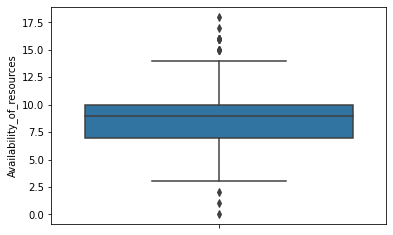

In [29]:
sns.boxplot(data=data,y="Availability_of_resources")

In [30]:
iqr=data.Availability_of_resources.quantile(0.75)-data.Availability_of_resources.quantile(0.25)
iqr

3.0

In [31]:
lb=data["Availability_of_resources"].quantile(0.25)-(iqr*3)
ub=data["Availability_of_resources"].quantile(0.75)+(iqr*3)
print(lb,ub)

-2.0 19.0


In [32]:
data.loc[data["Availability_of_resources"]>19.0,"Availability_of_resources"]=19.0
data.loc[data["Availability_of_resources"]<-2.0,"Availability_of_resources"]=-2.0

<AxesSubplot: ylabel='Profession'>

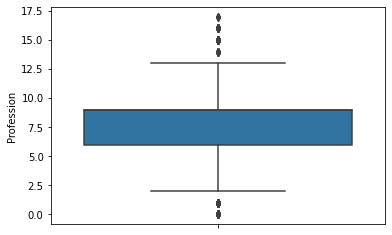

In [33]:
sns.boxplot(data=data,y="Profession")

In [34]:
iqr=data.Profession.quantile(0.75)-data.Profession.quantile(0.25)
iqr

3.0

In [35]:
data["Profession"].describe()

count    309.000000
mean       8.058252
std        4.899957
min        0.000000
25%        6.000000
50%        9.000000
75%        9.000000
max       17.000000
Name: Profession, dtype: float64

In [36]:
lb=data["Profession"].quantile(0.25)-(iqr*3)
ub=data["Profession"].quantile(0.75)+(iqr*3)
print(lb,ub)

-3.0 18.0


In [37]:
data.loc[data["Profession"]>18.0,"Profession"]=18.0
data.loc[data["Profession"]<-3.0,"Profession"]=-3.0

In [38]:
data.Family_member.value_counts()

4     148
5      69
3      50
6      19
2      12
7       3
9       3
10      2
12      1
14      1
8       1
Name: Family_member, dtype: int64

In [39]:
data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,9,450000,4,1,3,2,19,1,722,4,...,1,2023,3,1,2,0,1,1,0,2000000
1,17,1000000,4,3,3,5,19,2,1800,9,...,2,2010,4,2,1,0,1,0,0,2500000
2,9,200000,4,2,1,2,19,2,650,4,...,1,2005,3,2,3,0,1,0,0,500000
3,9,350000,4,1,0,2,19,1,400,12,...,1,2021,3,3,1,0,1,0,0,2000000
4,9,100000,5,1,1,2,19,3,1200,7,...,2,2023,4,3,1,0,1,0,0,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,9,1200000,4,2,3,3,30,2,900,2,...,2,2021,5,4,2,1,1,0,0,3500000
305,15,1000000,5,1,3,3,30,2,1000,10,...,2,2018,4,2,2,0,1,0,0,3200000
306,0,1400000,4,1,2,3,30,3,1300,1,...,3,2020,5,4,2,1,1,0,0,5000000
307,0,1600000,6,2,2,3,30,2,950,1,...,2,2022,4,4,2,1,1,0,0,4000000


# EDA

In [40]:
x1=data["Availability_of_flat"]
x1

0      2023
1      2010
2      2005
3      2021
4      2023
       ... 
304    2021
305    2018
306    2020
307    2022
308    2021
Name: Availability_of_flat, Length: 309, dtype: int64

In [41]:
x2=data["Price"]

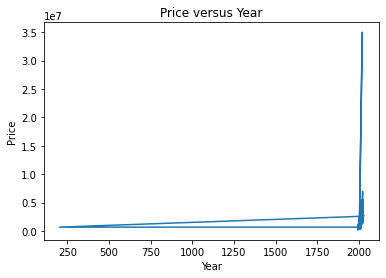

In [42]:
plt.plot(x1,x2)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price versus Year")
plt.show()

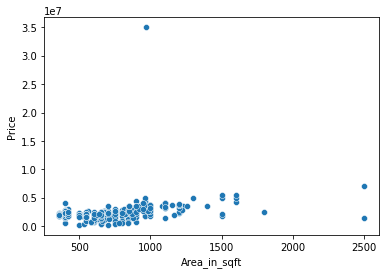

In [43]:
sns.scatterplot(x="Area_in_sqft", y="Price", data=data)
plt.show()

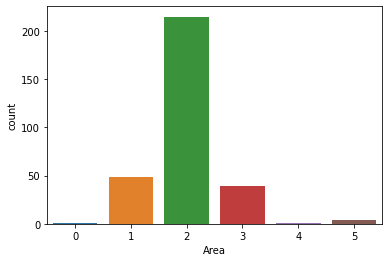

In [44]:
sns.countplot(data["Area"])
plt.show()

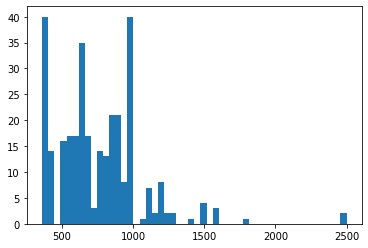

In [45]:
plt.hist(data["Area_in_sqft"],bins=50)
plt.show()

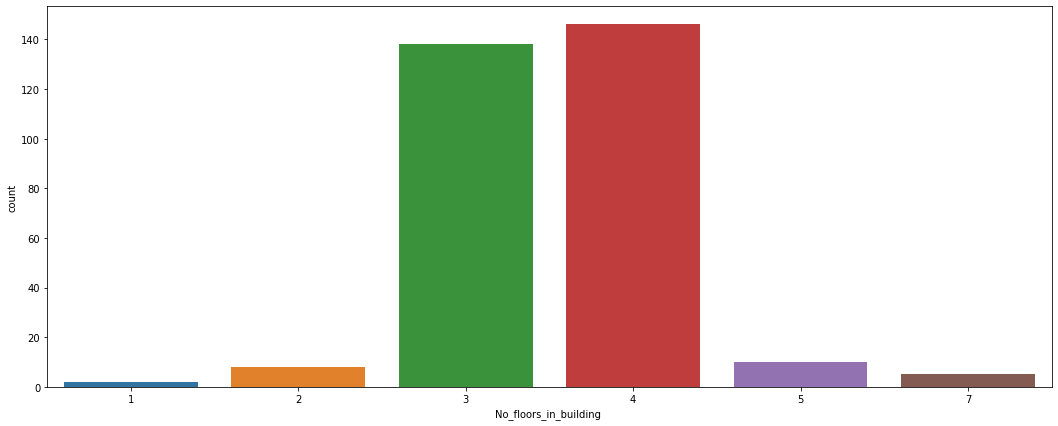

In [46]:
plt.figure(figsize=(18,7))
sns.countplot(data["No_floors_in_building "])
plt.show()


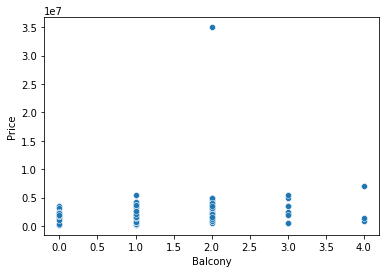

In [47]:
sns.scatterplot(x="Balcony",y="Price",data=data)
plt.show()

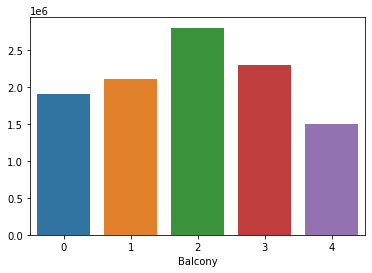

In [48]:
temp = data.groupby("Balcony")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

In [49]:
# According to this price of flat is higher if there is 2 balcony and lower for 4

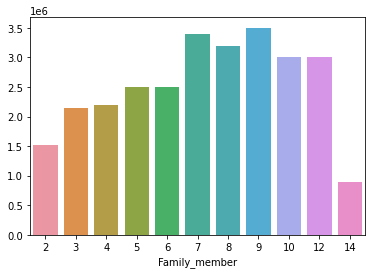

In [50]:
temp=data.groupby("Family_member")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

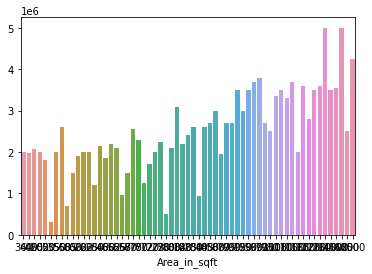

In [51]:
temp=data.groupby("Area_in_sqft")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

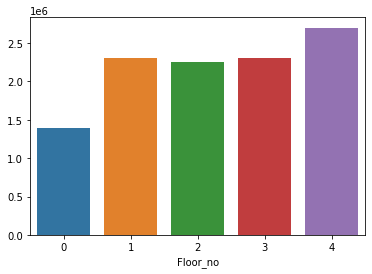

In [52]:
temp=data.groupby("Floor_no")["Price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

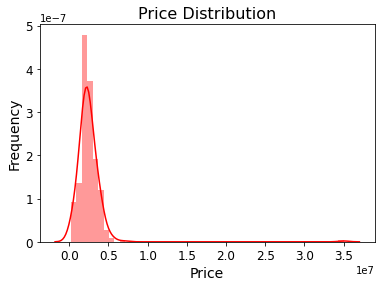

In [53]:
sns.distplot(data['Price'], color = 'r')
plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

# Linear Model

In [54]:
data

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,9,450000,4,1,3,2,19,1,722,4,...,1,2023,3,1,2,0,1,1,0,2000000
1,17,1000000,4,3,3,5,19,2,1800,9,...,2,2010,4,2,1,0,1,0,0,2500000
2,9,200000,4,2,1,2,19,2,650,4,...,1,2005,3,2,3,0,1,0,0,500000
3,9,350000,4,1,0,2,19,1,400,12,...,1,2021,3,3,1,0,1,0,0,2000000
4,9,100000,5,1,1,2,19,3,1200,7,...,2,2023,4,3,1,0,1,0,0,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,9,1200000,4,2,3,3,30,2,900,2,...,2,2021,5,4,2,1,1,0,0,3500000
305,15,1000000,5,1,3,3,30,2,1000,10,...,2,2018,4,2,2,0,1,0,0,3200000
306,0,1400000,4,1,2,3,30,3,1300,1,...,3,2020,5,4,2,1,1,0,0,5000000
307,0,1600000,6,2,2,3,30,2,950,1,...,2,2022,4,4,2,1,1,0,0,4000000


In [55]:
data_x=data.iloc[:,0:20]
data_y=data.iloc[:,-1]

In [56]:
data_x

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,Availability_of_resources,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat
0,9,450000,4,1,3,2,19,1,722,4,9,1,2023,3,1,2,0,1,1,0
1,17,1000000,4,3,3,5,19,2,1800,9,7,2,2010,4,2,1,0,1,0,0
2,9,200000,4,2,1,2,19,2,650,4,11,1,2005,3,2,3,0,1,0,0
3,9,350000,4,1,0,2,19,1,400,12,8,1,2021,3,3,1,0,1,0,0
4,9,100000,5,1,1,2,19,3,1200,7,2,2,2023,4,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,9,1200000,4,2,3,3,30,2,900,2,10,2,2021,5,4,2,1,1,0,0
305,15,1000000,5,1,3,3,30,2,1000,10,10,2,2018,4,2,2,0,1,0,0
306,0,1400000,4,1,2,3,30,3,1300,1,10,3,2020,5,4,2,1,1,0,0
307,0,1600000,6,2,2,3,30,2,950,1,10,2,2022,4,4,2,1,1,0,0


In [57]:
data_y

0      2000000
1      2500000
2       500000
3      2000000
4      2400000
        ...   
304    3500000
305    3200000
306    5000000
307    4000000
308    3500000
Name: Price, Length: 309, dtype: int64

In [58]:
import sklearn
from sklearn.model_selection import train_test_split

In [59]:
b_x_train,b_x_test,b_y_train,b_y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [60]:
b_x_train.shape,b_x_test.shape,b_y_train.shape,b_y_test.shape

((247, 20), (62, 20), (247,), (62,))

In [61]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [62]:
lin.fit(b_x_train,b_y_train)

LinearRegression()

In [63]:
lin_p=lin.predict(b_x_test)
lin_p

array([2940991.31388283, 1864356.52716477, 2359643.52582604,
       2047922.99584637, 1441990.8320601 , 3061221.35990017,
       3450542.86212682, 1534712.46326853, 4124953.86296242,
       1134821.71197152, 1427273.0553149 , 2128550.81830724,
       3288099.56149521, 1513579.78534446, 3759984.89874337,
       2462143.5157284 , 4408812.49243766, 2925540.12478151,
       1900606.21939073, 2264061.55798398, 1140371.05006114,
       3110444.56570387, 2285972.7713747 , 1743502.22335372,
       4064075.72306988, 2188138.52916925, 3140119.46378037,
        584276.11241029, 2404514.03582391, 2449028.13220188,
       3542633.04472117, 2320549.22778442, 2272950.38860288,
       3390516.39463439, 3447360.7134414 , 1663127.06703368,
       4073706.13218095, 3369404.76191875, 3155373.83921214,
       2477942.63702651, 1739154.32568868, 1548376.88571169,
       2138750.14648728, 1997243.14877249, 2014174.2652917 ,
       1598611.84730628, 4714486.0872298 , 1989933.17250338,
       6165221.47531909,

In [64]:
lin.coef_

array([ 4.35341042e+04,  6.39293413e-01,  1.48277957e+05, -2.36222915e+05,
       -4.80219135e+04, -3.91301333e+04,  9.31823077e+03,  3.09735983e+04,
        4.88804565e+02,  4.16910739e+04, -3.91483099e+04,  7.92655104e+05,
        7.49943657e+02,  3.36833582e+05, -1.54694306e+05,  8.83610915e+04,
        7.72470602e+05, -7.99979695e+05,  9.06879391e+04, -3.89606118e+05])

In [65]:
lin.intercept_

-2253233.432302307

In [66]:
R2=lin.score(b_x_train,b_y_train)
R2

0.18369740875044538

In [67]:
Adj_R2=1-(((1-R2)*(309-1))/(309-20-1))
Adj_R2

0.12700972880255967

In [68]:
from sklearn import metrics

In [69]:
mse=metrics.mean_squared_error(b_y_test,lin_p)
mse

486061685090.4024

In [70]:
#RMSE,MAPE

rmse=pow(mse,0.5)
rmse

697181.2426409667

In [71]:
df1=pd.DataFrame({"Actual":b_y_test,"Predicted":lin_p})
df1

,Actual,Predicted
273,2500000,2.940991e+06
8,1800000,1.864357e+06
293,2100000,2.359644e+06
130,1750000,2.047923e+06
204,1900000,1.441991e+06
...,...,...
201,2000000,1.940371e+06
206,1400000,2.314299e+06
48,2600000,3.441518e+06
183,2200000,3.061524e+06


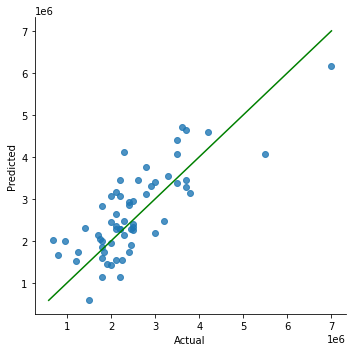

In [72]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Random forest Regressor

In [73]:
x=data.iloc[:,0:20]
y=data.iloc[:,-1]

In [74]:
import sklearn
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [76]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((247, 20), (62, 20), (247,), (62,))

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [78]:
rfr.fit(x_train,y_train)      

RandomForestRegressor()

In [79]:
rfr_p=rfr.predict(x_test)

In [80]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8470538724218306

In [81]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-20-1))
rf_adr

0.8364326135622355

In [82]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

802149685440.3226

In [83]:
rmse=pow(rfr_MSE,0.5)
rmse

895628.0954951796

In [84]:
#Prediction 

In [85]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8470538724218306

In [86]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-19-1))
rf_adr

0.8369985906779371

In [87]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

802149685440.3226

# Ada- Boost Regressor

In [88]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [89]:
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [90]:
ad_p=ad.predict(x_test)


In [91]:
ad_rsq=ad.score(x_train,y_train)
ad_rsq

0.9596091842641449

In [92]:
ad_adr=1-(((1-ad_rsq)*(309-1))/(309-19-1))
ad_adr

0.9569537327105766

In [93]:
ad_MSE=metrics.mean_squared_error(y_test,ad_p)
ad_MSE

489454127558.949

In [94]:
rmse=pow(ad_MSE,0.5)
rmse

699609.9824609058

# XG Boost Regressor

In [95]:
import xgboost

In [96]:
from xgboost import  XGBRFRegressor
xgb=XGBRFRegressor()

In [97]:
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [98]:
xgb_p=xgb.predict(x_test)

In [99]:
xgb_rsq=xgb.score(x_train,y_train)
xgb_rsq


0.9384994683643112

In [100]:
xgb_adr=1-(((1-xgb_rsq)*(309-1))/(309-19-1))
xgb_adr

0.9344561808173282

In [101]:
xgb_mse=metrics.mean_squared_error(y_test,xgb_p)
xgb_mse

648895879254.6537

In [102]:
rmse=pow(xgb_mse,0.5)
rmse

805540.7371788553

In [103]:
list1=["LinearRegression","Random forest Regressor","Ada- Boost Regressor","XG Boost Regressor",]
list2=[R2,rf_rsq,ad_rsq,xgb_rsq]
list3=[Adj_R2,rf_adr,ad_adr,xgb_adr]
list4=[mse,rfr_MSE,ad_MSE,xgb_mse]

In [104]:
final_result=pd.DataFrame({"Model_Name":list1,"R-square":list2,"Adj_R2":list3,"MSE":list4})
final_result

,Model_Name,R-square,Adj_R2,MSE
0,LinearRegression,0.183697,0.127010,4.860617e+11
1,Random forest Regressor,0.847054,0.836999,8.021497e+11
2,Ada- Boost Regressor,0.959609,0.956954,4.894541e+11
3,XG Boost Regressor,0.938499,0.934456,6.488959e+11


# NLP

In [105]:
nlp=pd.read_excel(r"C:\Users\Lenovo\Documents\MSC Project\Data (1).xlsx")
nlp

,Profession,Annual_Income,Family_member,Family_earners,source_of_flat,Area,Location,Type_of_flat,Area_in_sqft,Amenities,...,Bathrooms,Availability_of_flat,No_floors_in_building,Floor_no,Balcony,Lift,Parking,Water_supply,Buying_of_Flat,Price
0,Job,450000,4,1,Friend,Built-up,Near TC College,1,722,Children Play ground,...,1,2023,3,1,2,No,Yes,One day later,By EMI,2000000
1,Treding,1000000,4,3,Friend,Super built-up,Near TC College,2,1800,"Garden, Children Play ground",...,2,2010,4,2,1,No,Yes,Everyday,By EMI,2500000
2,Job,200000,4,2,Dealer,Built-up,Near TC College,2,650,Children Play ground,...,1,2005,3,2,3,No,Yes,Everyday,By EMI,500000
3,Job,350000,4,1,Advertisement,Built-up,Near TC College,1,400,No,...,1,2021,3,3,1,No,Yes,Everyday,By EMI,2000000
4,Job,100000,5,1,Dealer,Built-up,Near TC College,3,1200,Garden,...,2,2023,4,3,1,No,Yes,Everyday,By EMI,2400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Job,1200000,4,2,Friend,Super built-up,Sahyog Society,2,900,"Auditoriam Garden, Children Play ground",...,2,2021,5,4,2,Yes,Yes,Everyday,By EMI,3500000
305,Teacher,1000000,5,1,Friend,Super built-up,Sahyog Society,2,1000,"Garden, Children Play ground",...,2,2018,4,2,2,No,Yes,Everyday,By EMI,3200000
306,Business,1400000,4,1,Dealers,Super built-up,Sahyog Society,3,1300,Auditoriam Children Play ground,...,3,2020,5,4,2,Yes,Yes,Everyday,By EMI,5000000
307,Business,1600000,6,2,Dealers,Super built-up,Sahyog Society,2,950,Auditoriam Children Play ground,...,2,2022,4,4,2,Yes,Yes,Everyday,By EMI,4000000


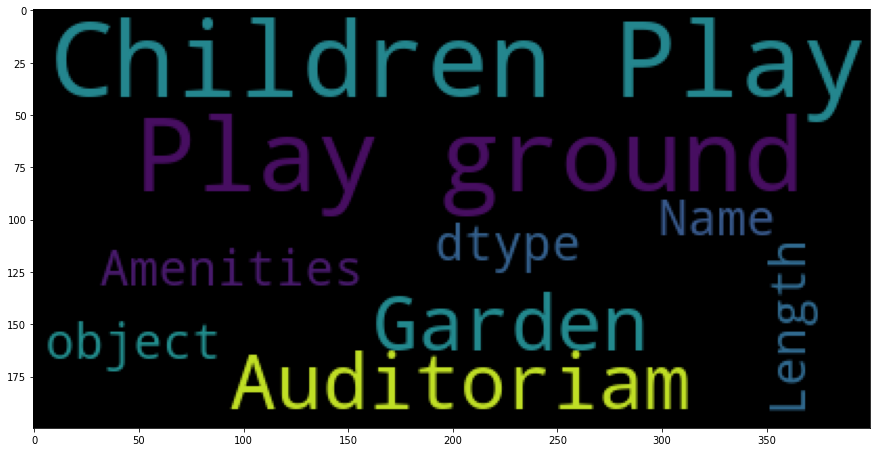

In [106]:
wc=WordCloud(max_words=50)
Cloud=wc.generate(str(nlp.Amenities))
fig=plt.figure(figsize=(15,15)) 
plt.imshow(Cloud)

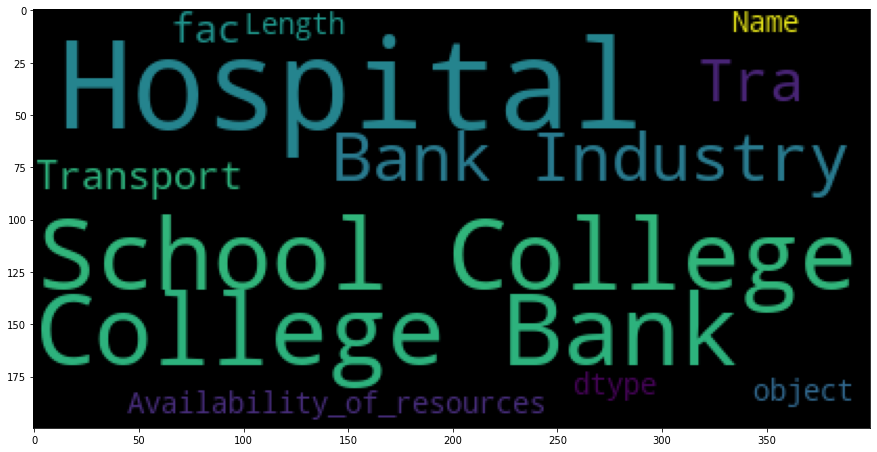

In [107]:
wc=WordCloud(max_words=50)
Cloud=wc.generate(str(nlp.Availability_of_resources))
fig=plt.figure(figsize=(15,15)) 
plt.imshow(Cloud)

# RFE=Recursive FS

In [108]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [109]:
rfe=RFE(dTree)

In [110]:
rfe.fit(data.iloc[:,0:20],data.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [111]:
rfe.support_

array([ True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False, False])

In [112]:
df3=pd.DataFrame({"Score":list(rfe.support_),"columns":list(data.iloc[:,0:20])})
df3

,Score,columns
0,True,Profession
1,True,Annual_Income
2,False,Family_member
3,True,Family_earners
4,True,source_of_flat
5,False,Area
6,True,Location
7,False,Type_of_flat
8,True,Area_in_sqft
9,True,Amenities


In [113]:
df=data.drop(["source_of_flat","Area","Type_of_flat ","Bathrooms ","No_floors_in_building ","Balcony","Lift","Parking","Water_supply","Buying_of_Flat"],axis=1)

In [114]:
df

,Profession,Annual_Income,Family_member,Family_earners,Location,Area_in_sqft,Amenities,Availability_of_resources,Availability_of_flat,Floor_no,Price
0,9,450000,4,1,19,722,4,9,2023,1,2000000
1,17,1000000,4,3,19,1800,9,7,2010,2,2500000
2,9,200000,4,2,19,650,4,11,2005,2,500000
3,9,350000,4,1,19,400,12,8,2021,3,2000000
4,9,100000,5,1,19,1200,7,2,2023,3,2400000
...,...,...,...,...,...,...,...,...,...,...,...
304,9,1200000,4,2,30,900,2,10,2021,4,3500000
305,15,1000000,5,1,30,1000,10,10,2018,2,3200000
306,0,1400000,4,1,30,1300,1,10,2020,4,5000000
307,0,1600000,6,2,30,950,1,10,2022,4,4000000


In [115]:
df_x=df.iloc[:,0:10]
df_y=df.iloc[:,-1]

In [116]:
df_x

,Profession,Annual_Income,Family_member,Family_earners,Location,Area_in_sqft,Amenities,Availability_of_resources,Availability_of_flat,Floor_no
0,9,450000,4,1,19,722,4,9,2023,1
1,17,1000000,4,3,19,1800,9,7,2010,2
2,9,200000,4,2,19,650,4,11,2005,2
3,9,350000,4,1,19,400,12,8,2021,3
4,9,100000,5,1,19,1200,7,2,2023,3
...,...,...,...,...,...,...,...,...,...,...
304,9,1200000,4,2,30,900,2,10,2021,4
305,15,1000000,5,1,30,1000,10,10,2018,2
306,0,1400000,4,1,30,1300,1,10,2020,4
307,0,1600000,6,2,30,950,1,10,2022,4


In [117]:
import sklearn
from sklearn.model_selection import train_test_split

In [118]:
b_x_train,b_x_test,b_y_train,b_y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=101)

In [119]:
b_x_train.shape,b_x_test.shape,b_y_train.shape,b_y_test.shape

((247, 10), (62, 10), (247,), (62,))

In [120]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [121]:
lin.fit(b_x_train,b_y_train)

LinearRegression()

In [122]:
lin_p=lin.predict(b_x_test)
lin_p

array([2495890.50998193, 2938881.46453857, 2340075.9421027 ,
       2003025.61446901, 1589011.71078772, 2936538.70302884,
       2949411.28052344, 1600836.29654103, 3181805.40898322,
       2903519.33660062, 1473086.22802372, 2286324.52700823,
       2923765.5570309 , 2056939.43856282, 3630651.91969035,
       2356412.71053719, 4292329.77185263, 3554480.60739751,
       1514905.61327893, 2294936.90905362, 2193180.23488115,
       2356449.66748166, 2134059.94533342, 2025830.79151351,
       4543092.74901148, 2195842.71622365, 2766222.81763158,
       1648944.51946332, 3304680.95052447, 2033072.8333091 ,
       2876458.09387259, 2240551.69000776, 2280707.49153257,
       3327335.35922615, 3502852.53088757, 2118436.5299985 ,
       3330233.88340936, 2601371.09849196, 2977680.21042092,
       2440450.52088535, 2256227.11577535, 2213075.32730812,
       1820525.48791383, 1947296.57884607, 2204933.89540568,
       2206723.05750363, 3508663.51067621, 2622073.2322029 ,
       6361900.66521517,

In [123]:
lin.coef_

array([ 4.79793456e+04,  7.99467798e-01,  1.92037051e+05, -3.39716537e+05,
        4.29028017e+03,  1.83396751e+03, -6.95001541e+03, -5.18476798e+04,
        9.74953895e+02, -4.52077255e+03])

In [124]:
lin.intercept_

-1666449.2757762992

In [125]:
R2=lin.score(b_x_train,b_y_train)
R2

0.10171157623049576

In [126]:
Adj_R2=1-(((1-R2)*(309-1))/(309-20-1))
Adj_R2

0.03933043569094685

In [127]:
from sklearn import metrics

In [128]:
mse=metrics.mean_squared_error(b_y_test,lin_p)
mse

445744528604.7392

In [129]:
rmse=pow(mse,0.5)
rmse

667641.017766838

In [130]:
df1=pd.DataFrame({"Actual":b_y_test,"Predicted":lin_p})
df1

,Actual,Predicted
273,2500000,2.495891e+06
8,1800000,2.938881e+06
293,2100000,2.340076e+06
130,1750000,2.003026e+06
204,1900000,1.589012e+06
...,...,...
201,2000000,2.061175e+06
206,1400000,1.971433e+06
48,2600000,2.710981e+06
183,2200000,2.458632e+06


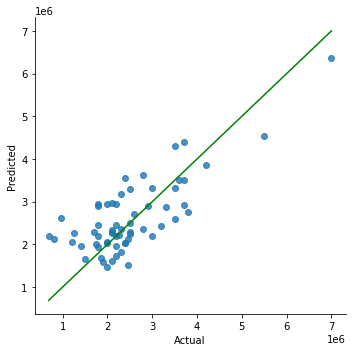

In [131]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Random forest Regressor

In [132]:
import sklearn
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=100)

In [134]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((247, 10), (62, 10), (247,), (62,))

In [135]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [136]:
rfr.fit(x_train,y_train) 

RandomForestRegressor()

In [137]:
rfr_p=rfr.predict(x_test)

In [138]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8153295185501576

In [139]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-20-1))
rf_adr

0.8025051795605852

In [140]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

706089599203.2258

In [141]:
rmse=pow(rfr_MSE,0.5)
rmse

840291.3775609183

In [142]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.8153295185501576

In [143]:
rf_adr=1-(((1-rf_rsq)*(309-1))/(309-19-1))
rf_adr

0.8031885526416904

In [144]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

706089599203.2258

# Ada- Boost Regressor

In [145]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [146]:
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [147]:
ad_p=ad.predict(x_test)

In [148]:
ad_rsq=ad.score(x_train,y_train)
ad_rsq

0.9433888318911114

In [149]:
ad_adr=1-(((1-ad_rsq)*(309-1))/(309-11-1))
ad_adr

0.9412921219611526

In [150]:
ad_MSE=metrics.mean_squared_error(y_test,ad_p)
ad_MSE

557306881285.0527

In [151]:
rmse=pow(ad_MSE,0.5)
rmse

746529.8930954157

# XG Boost Regressor

In [152]:
import xgboost

In [153]:
from xgboost import  XGBRFRegressor
xgb=XGBRFRegressor()

In [154]:
xgb.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [155]:
xgb_p=xgb.predict(x_test)

In [156]:
xgb_rsq=xgb.score(x_train,y_train)
xgb_rsq

0.9441657616733337

In [157]:
xgb_adr=1-(((1-xgb_rsq)*(309-1))/(309-11-1))
xgb_adr

0.9420978269204942

In [158]:
xgb_mse=metrics.mean_squared_error(y_test,xgb_p)
xgb_mse

597295772094.0867

In [159]:
rmse=pow(xgb_mse,0.5)
rmse

772849.1263462013

In [160]:
list1=["LinearRegression","Random forest Regressor","Ada- Boost Regressor","XG Boost Regressor",]
list2=[R2,rf_rsq,ad_rsq,xgb_rsq]
list3=[Adj_R2,rf_adr,ad_adr,xgb_adr]
list4=[mse,rfr_MSE,ad_MSE,xgb_mse]

In [161]:
final_result=pd.DataFrame({"Model_Name":list1,"R-square":list2,"Adj_R2":list3,"MSE":list4})
final_result

,Model_Name,R-square,Adj_R2,MSE
0,LinearRegression,0.101712,0.039330,4.457445e+11
1,Random forest Regressor,0.815330,0.803189,7.060896e+11
2,Ada- Boost Regressor,0.943389,0.941292,5.573069e+11
3,XG Boost Regressor,0.944166,0.942098,5.972958e+11


In [162]:
# random forest for making predictions for regression


In [163]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [164]:
# define dataset

In [165]:
X=data.iloc[:,0:10]
y=data.iloc[:,-1]


In [166]:
# define the model
model = RandomForestRegressor()


In [167]:
# fit the model on the whole dataset
model.fit(X, y)
RandomForestRegressor()

RandomForestRegressor()

In [168]:
row = [[0,1600000,6,2,15,950,1,6,2022,4]]


In [169]:
# make a single prediction
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: 3805000
